Week 1 Code Sample Assignment
Please modify the aging buckets high/low amounts in order to get a different result for the output. Upload your modified notebook to canvas for the first assignment. 

In [1]:
#import relative packages

import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [3]:
# this cell will be to generate the synthetic data 

# set the number of departments/units
n_units = 5
business_units = [f"Unit {i+1}" for i in range(n_units)]
np.random.seed(42)  # for reproducibility - helps with random data generation

# define the aging buckets for the receivables and monetary amounts
aging_buckets = {
    'Current': (10000, 500000),
    '1-30 Days': (5000, 500000),
    '31-60 Days': (5000, 300000),
    '61-90 Days': (2000, 250000),
    '91-120 Days': (1000, 100000),
    '121-365': (500, 80000),
    'Over 365 Days': (100, 50000),
    'Unapplied Payments': (-3000, -100),
    # the are the number of invoices per bucket
    '# of Invoices': (10, 500)
}

# generate the data from parameters
data = {'Business Unit': business_units}
for bucket, (low, high) in aging_buckets.items():
    if bucket == '# of Invoices':
        data[bucket] = np.random.randint(low, high, n_units)
    else:
        data[bucket] = np.round(np.random.uniform(low, high, n_units), 2)

df = pd.DataFrame(data)
df['Total Due'] = df[['Current', '1-30 Days', '31-60 Days', '61-90 Days','91-120 Days', '121-365', 'Over 365 Days']].sum(axis=1)
df['Net Amount Due'] = df['Total Due'] + df['Unapplied Payments']


# show the dataframe
df.head()


,Business Unit,Current,1-30 Days,31-60 Days,61-90 Days,91-120 Days,121-365,Over 365 Days,Unapplied Payments,# of Invoices,Total Due,Net Amount Due
0,Unit 1,193524.66,82217.29,11072.43,47484.32,61573.44,62921.49,30416.49,-655.65,464,489210.12,488554.47
1,Unit 2,475850.01,33751.39,291123.41,77452.08,14809.89,16374.07,8609.15,-2116.62,437,917970.00,915853.38
2,Unit 3,368677.03,433757.19,250570.58,132139.60,29922.32,41381.64,3346.07,-2716.75,273,1259794.43,1257077.68
3,Unit 4,303342.66,302551.93,67640.04,109122.36,37269.82,47596.96,47449.39,-1015.72,440,914973.16,913957.44
4,Unit 5,86449.13,355495.93,58638.37,74224.83,46150.93,4192.81,48285.04,-1723.56,44,673437.04,671713.48


In [4]:
# calculate present value of the receivables to show how much money we are losing
discount_rate = 0.05  # 5% discount rate

# map the buckets to months
aging_buckets = {
    'Current': 0,
    '1-30 Days': 1,
    '31-60 Days': 2,
    '61-90 Days': 3,
    '91-120 Days': 4,
    '121-365': 8,
    'Over 365 Days': 18,
}

# calculate the present value for each bucket
for bucket, months in aging_buckets.items():
    df[f'{bucket} PV'] = df[bucket] / ((1 + discount_rate) ** (months))

# calculate the total present value
df['Total PV'] = df[[f'{bucket} PV' for bucket in aging_buckets]].sum(axis=1)


#show results of present value
df[['Business Unit', 'Total Due', 'Total PV']]

,Business Unit,Total Due,Total PV
0,Unit 1,489210.12,4.287716e+05
1,Unit 2,917970.00,8.658018e+05
2,Unit 3,1259794.43,1.177217e+06
3,Unit 4,914973.16,8.296965e+05
4,Unit 5,673437.04,6.031914e+05


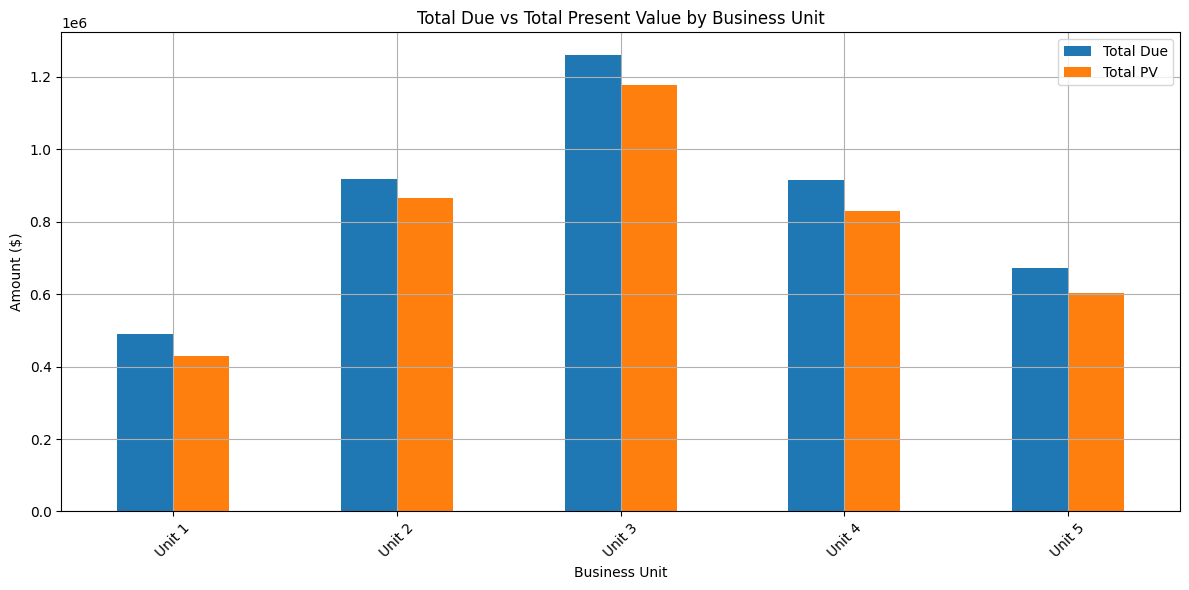

In [5]:
# plot and print the results
df.plot(x= 'Business Unit', y=['Total Due', 'Total PV'], kind='bar', figsize=(12, 6), title='Total Due vs Total Present Value by Business Unit')
#plt.title('Total Due vs Total Present Value by Business Unit')
plt.ylabel('Amount ($)')
plt.xlabel('Business Unit')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()